In [1]:
#Instalamos la librería que vamos a necesitar para abrir el archivo dta
!pip install pyreadstat
%pip install pyod
%pip install openpyxl
# Primero importamos las librerías necesarias para leer y manipular la base de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pyreadstat as prs


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Abrimos la carpeta donde se encuentran las bases de datos
#os.chdir(r"C:/Users\s1248850/OneDrive - Syngenta/Documents/Rosario Luque/Ciencias de datos/TP/TP3")
os.chdir(r"c:\Users\s1290226\OneDrive - Syngenta\Desktop\UdeSA\Ciencia de datos\CC408-T2-3\TP3")
# Guardamos las bases de datos en en dos variables
ind_2004, meta = prs.read_dta("Individual_t104.dta")

ind_2024 = pd.read_excel("usu_individual_T124.xlsx")

Para poder trabajar con ambas bases de datos es necesario primero pasar el nombre de todas las columnas a minúscula. Esto nos permitirá luego concatenar las bases de datos en una sola y preservar la estructura de la información.

In [3]:
# En la base de datos del 2024 los nombres de las columnas están en mayúsculas.
# Entonces, cambiamos los nombres de las columnas a minúsculas.
ind_2024.columns = ind_2024.columns.str.lower()
#ind_2024.head()

#Just in case, hacemos lo mismo para la base del 2004.
ind_2004.columns = ind_2004.columns.str.lower()
ind_2004.head()

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000


a. Eliminen todas las observaciones que no corresponden a los
aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos
Aires, y unan ambos trimestres en una sola base.

In [4]:
# Contar el número de filas en el dataframe ind_2004 que tienen el valor 32 y 33 en la columna "aglomerado"
count_32_33 = ind_2004[ind_2004['aglomerado'].isin([32, 33])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 es: {count_32_33}")
# Contar el número de filas en el dataframe ind_2024 que tienen el valor 32 y 33 en la columna "aglomerado"
count_32_33 = ind_2024[ind_2024['aglomerado'].isin([32, 33])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 es: {count_32_33}")

El número de filas con aglomerado 32 y 33 es: 7647
El número de filas con aglomerado 32 y 33 es: 7051


In [5]:
# Primero filtramos los aglomerados de Ciudad Autónoma de Buenos Aires (32) y Gran Buenos Aires (33)
#aglomerados_deseados = ['Ciudad Autónoma de Buenos Aires', 'Gran Buenos Aires']
ind_2004 = ind_2004[ind_2004['aglomerado'].isin([32, 33])]
ind_2024 = ind_2024[ind_2024['aglomerado'].isin([32, 33])]


# Luego unimos ambos trimestres en una sola bases de datos
df_unificado = pd.concat([ind_2004, ind_2024], ignore_index=True)
# Y eliminamos las columnas que se encuentran solo en la base de datos del 2004.
df_unificado = df_unificado.drop(columns=["ch05","imputa","pondiio","pondii","pondih"])

df_unificado.tail()

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
14693,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,1.0,1.0,2024.0,1.0,1.0,S,33.0,3410.0,...,12,NaN,12,12.0,NaN,12,NaN,NaN,NaN,NaN
14694,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,2.0,2.0,2024.0,1.0,1.0,S,33.0,3410.0,...,12,NaN,12,12.0,NaN,12,NaN,NaN,NaN,NaN
14695,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,3.0,2.0,2024.0,1.0,1.0,S,33.0,3410.0,...,12,NaN,12,12.0,NaN,12,NaN,NaN,NaN,NaN
14696,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,4.0,2.0,2024.0,1.0,1.0,S,33.0,3410.0,...,12,NaN,12,12.0,NaN,12,NaN,NaN,NaN,NaN
14697,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,5.0,2.0,2024.0,1.0,1.0,S,33.0,3410.0,...,12,NaN,12,12.0,NaN,12,NaN,NaN,NaN,NaN


In [6]:
# Guardar el DataFrame df_unificado en un archivo Excel
df_unificado.to_excel("df_unificado.xlsx", index=False)
print("El archivo se ha guardado en el directorio actual.")

El archivo se ha guardado en el directorio actual.


b. Si hay observaciones con valores que no tienen sentido,
descártenlas (por ejemplo, ingresos y edades negativos). Expliquen
las decisiones tomadas.

In [8]:
# Renombrar la columna ch06 a "Edad"
df_unificado.rename(columns={'ch06': 'Edad'}, inplace=True)

# Las variables referentes a ingreso son: 

In [9]:
# Select only numeric columns
numeric_cols = df_unificado.select_dtypes(include=[np.number])

# Check for negative values in each column and count them
negative_counts = (numeric_cols < 0).sum()

# Filter out columns that have no negative values
negative_counts = negative_counts[negative_counts > 0]

# Display the result
print("Columns with negative values and their counts:")
print(negative_counts)

Columns with negative values and their counts:
Edad        182
pp06c       310
pp06d       108
pp08d1      601
pp08f1       44
pp08f2       39
pp08j1      166
pp08j2        5
pp08j3        1
p21         946
tot_p12     104
p47t       1292
v2_m        174
v3_m          2
v5_m         42
v8_m         18
v9_m          3
v10_m        40
v11_m        14
v12_m        52
v18_m         2
v21_m        73
t_vi        346
dtype: int64


In [12]:
# Definir los valores a eliminar luego de observar el excel
valores_a_eliminar = [-9, -8, -1] 

# Eliminar filas que contienen cualquiera de los valores en 'valores_a_eliminar'
df_unificado = df_unificado[~df_unificado.isin(valores_a_eliminar).any(axis=1)]
df_unificado = df_unificado[~df_unificado.isin(negative_counts).any(axis=1)]
ind_2024 = ind_2024[~ind_2024.isin(valores_a_eliminar).any(axis=1)]
ind_2004 = ind_2004[~ind_2004.isin(valores_a_eliminar).any(axis=1)]
# Mostrar el DataFrame limpio
print("DataFrame limpio:")
df_unificado
#en teoría, con esto quedaron eliminados los valores negativos. Me fije cuales eran desde el excel

DataFrame limpio:


,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
2,125515,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
5,125558,1.0,3.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14690,TQRMNOSXVHJKKMCDEIJAH00794775,1.0,2.0,1.0,2024.0,1.0,1.0,S,33.0,2818.0,...,12,NaN,12,12.0,NaN,12,NaN,NaN,NaN,NaN
14694,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,2.0,2.0,2024.0,1.0,1.0,S,33.0,3410.0,...,12,NaN,12,12.0,NaN,12,NaN,NaN,NaN,NaN
14695,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,3.0,2.0,2024.0,1.0,1.0,S,33.0,3410.0,...,12,NaN,12,12.0,NaN,12,NaN,NaN,NaN,NaN
14696,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,4.0,2.0,2024.0,1.0,1.0,S,33.0,3410.0,...,12,NaN,12,12.0,NaN,12,NaN,NaN,NaN,NaN


In [11]:
# Select only numeric columns
numeric_cols = df_unificado.select_dtypes(include=[np.number])

# Check for negative values in each column and count them
negative_counts = (numeric_cols < 0).sum()

# Filter out columns that have no negative values
negative_counts = negative_counts[negative_counts > 0]

# Display the result
print("Columns with negative values and their counts:")
print(negative_counts)

Columns with negative values and their counts:
pp06c    22
pp06d    12
dtype: int64


c. Una vez hecha esa limpieza, realicen un gráfico de barras
mostrando la composición por sexo para 2004 y 2024. Comenten
los resultados.

Valores en ch04 para 2004: ch04
1.0    3508
2.0    3965
Name: count, dtype: int64
Valores en ch04 para 2024: ch04
1.0    2619
2.0    3057
Name: count, dtype: int64


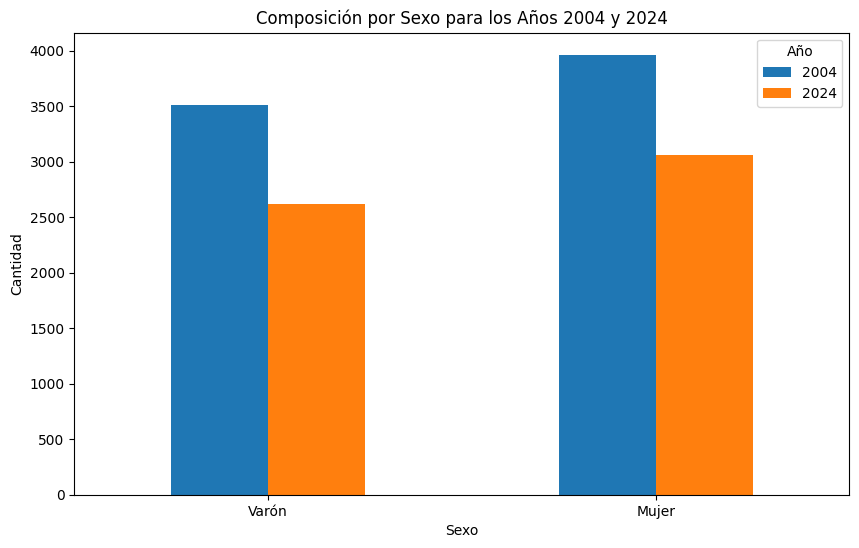

In [13]:
import matplotlib.pyplot as plt

# Filtrar los datos para los años 2004 y 2024
df_2004 = df_unificado[df_unificado['ano4'] == 2004.0]
df_2024 = df_unificado[df_unificado['ano4'] == 2024.0]

# Contar la cantidad de hombres y mujeres para cada año
sexo_2004 = df_2004['ch04'].value_counts().sort_index()
sexo_2024 = df_2024['ch04'].value_counts().sort_index()

# Verificar los valores en CH04
print("Valores en ch04 para 2004:", sexo_2004)
print("Valores en ch04 para 2024:", sexo_2024)

# Crear un DataFrame con los conteos
sexo_df = pd.DataFrame({
    '2004': sexo_2004,
    '2024': sexo_2024
}, index=[1, 2])

# Renombrar los índices para que sean 'Varón' y 'Mujer'
sexo_df.index = ['Varón', 'Mujer']

# Crear el gráfico de barras
sexo_df.plot(kind='bar', figsize=(10, 6))
plt.title('Composición por Sexo para los Años 2004 y 2024')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(title='Año')
plt.show()

d. Realicen una matriz de correlación para 2004 y 2024 con las
siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED,
ESTADO, CAT_INAC, IPCF.

In [16]:
columns_of_interest = ['ch04', 'Edad', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']
# Check if all columns exist in the dataframe
missing_columns = [col for col in columns_of_interest if col not in df_unificado.columns]
if not missing_columns:
    column_types = df_unificado[columns_of_interest].dtypes
    print(column_types)
else:
    print(f"Missing columns: {missing_columns}")


ch04        float64
Edad        float64
ch07        float64
ch08        float64
nivel_ed    float64
estado      float64
cat_inac    float64
ipcf        float64
dtype: object


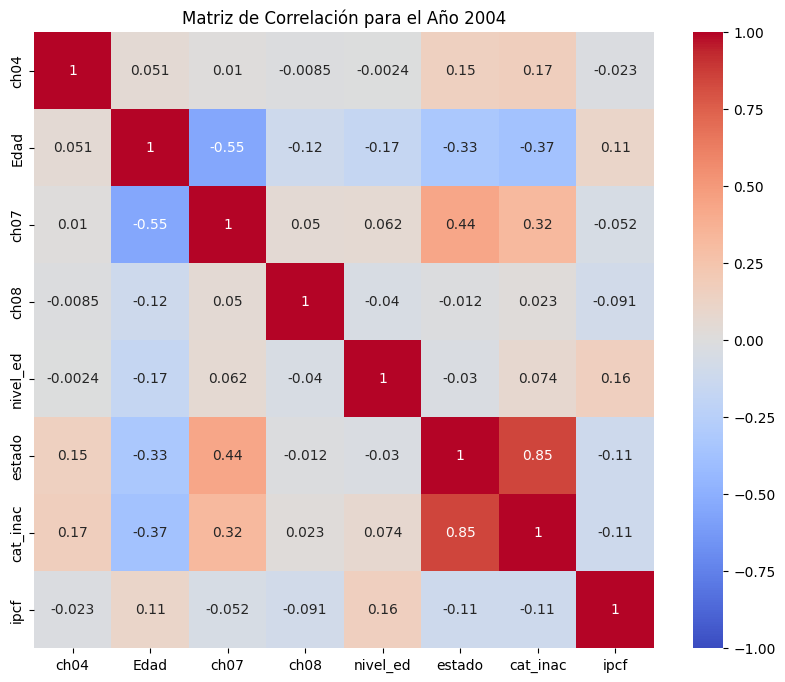

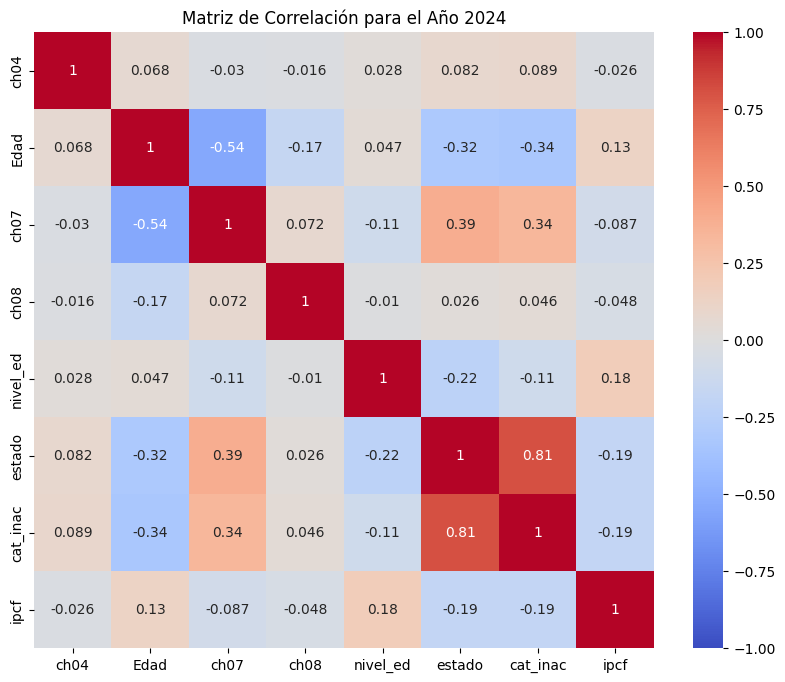

In [18]:

# Filtrar los datos para los años 2004 y 2024
df_2004 = df_unificado[df_unificado['ano4'] == 2004.0]
df_2024 = df_unificado[df_unificado['ano4'] == 2024.0]

# Seleccionar las columnas especificadas
variables = ['ch04', 'Edad', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']
df_2004_selected = df_2004.loc[:, variables]
df_2024_selected = df_2024.loc[:, variables]

# Calcular la matriz de correlación para cada año
correlation_2004 = df_2004_selected.corr()
correlation_2024 = df_2024_selected.corr()

# Crear un mapa de calor para la matriz de correlación de 2004
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_2004, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación para el Año 2004')
plt.show()

# Crear un mapa de calor para la matriz de correlación de 2024
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_2024, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación para el Año 2024')
plt.show()

e. ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos?
¿Cuál es la media de ingreso per cápita familiar (IPCF) según
estado (ocupado, desocupado, inactivo)?

In [19]:
# Filtrar los datos para los años 2004 y 2024
df_2004 = df_unificado[df_unificado['ano4'] == 2004.0]
df_2024 = df_unificado[df_unificado['ano4'] == 2024.0]

# Calcular la media del IPCF para cada estado en 2004
mean_ipcf_2004 = df_2004[df_2004['estado'].isin([1, 2, 3])].groupby('estado')['ipcf'].mean()

# Calcular la media del IPCF para cada estado en 2024
mean_ipcf_2024 = df_2024[df_2024['estado'].isin([1, 2, 3])].groupby('estado')['ipcf'].mean()

# Crear un DataFrame con los resultados
mean_ipcf = pd.DataFrame({
    '2004': mean_ipcf_2004,
    '2024': mean_ipcf_2024
})

# Renombrar los índices para que sean 'Ocupado', 'Desocupado', 'Inactivo'
state_labels = {1: 'Ocupado', 2: 'Desocupado', 3: 'Inactivo'}
mean_ipcf.index = mean_ipcf.index.map(state_labels)

mean_ipcf


,2004,2024
estado,,
Ocupado,477.525343,310812.411632
Desocupado,224.231970,94095.922562
Inactivo,315.891856,142072.539481


3. Uno de los grandes problemas de la EPH es la creciente cantidad de
hogares que no reportan sus ingresos (ver por ejemplo el siguiente
informe). ¿Cuántas personas no respondieron cuál es su condición de
actividad? Guarden como una base distinta llamada respondieron las
observaciones donde respondieron la pregunta sobre su condición de
actividad (ESTADO). Las observaciones con ESTADO=0 guárdenlas en una
base bajo el nombre norespondieron

In [23]:
# Filtrar las observaciones donde respondieron la pregunta sobre su condición de actividad
respondieron = df_unificado[df_unificado['estado'] != 0]

# Filtrar las observaciones donde no respondieron la pregunta sobre su condición de actividad
norespondieron = df_unificado[df_unificado['estado'] == 0]

# Mostrar la cantidad de personas que no respondieron su condición de actividad
print(f"Cantidad de personas que no respondieron su condición de actividad: {norespondieron.shape[0]}")

# Mostrar las primeras filas de las bases creadas
respondieron.head()
norespondieron.head()

Cantidad de personas que no respondieron su condición de actividad: 50


,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
1592,267757,1.0,1.0,2.0,2004.0,1.0,1.0,S,32.0,1568.0,...,01,,01,01,,01,0.0,0.0,0.0,00000
2208,135855,2.0,1.0,2.0,2004.0,1.0,1.0,S,33.0,1589.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2209,135855,2.0,2.0,2.0,2004.0,1.0,1.0,S,33.0,1589.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2210,135855,2.0,3.0,2.0,2004.0,1.0,1.0,S,33.0,1589.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2479,143090,1.0,2.0,2.0,2004.0,1.0,1.0,S,33.0,1728.0,...,06,,05,05,,06,0.0,0.0,0.0,00000


4. Agreguen a la base respondieron una columna llamada PEA
(Población Económicamente Activa) que tome 1 si están ocupados o
desocupados en ESTADO. Realicen un gráfico de barras mostrando la
composición por PEA para 2004 y 2024. Comenten los resultados.


C:\Users\s1290226\AppData\Local\Temp\ipykernel_22756\3534275769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)


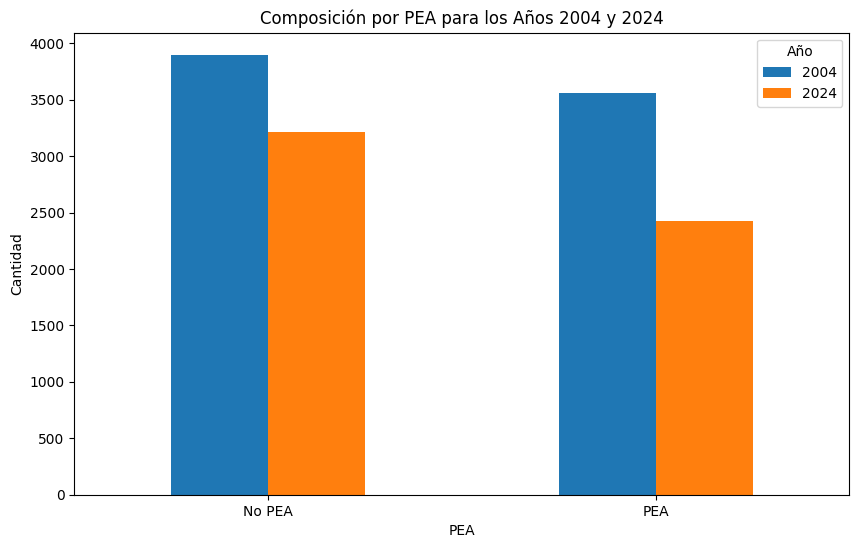

In [24]:
# Agregar la columna PEA (Población Económicamente Activa)
respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

# Filtrar los datos para los años 2004 y 2024
pea_2004 = respondieron[respondieron['ano4'] == 2004.0]['PEA'].value_counts().sort_index()
pea_2024 = respondieron[respondieron['ano4'] == 2024.0]['PEA'].value_counts().sort_index()

# Crear un DataFrame con los conteos
pea_df = pd.DataFrame({
    '2004': pea_2004,
    '2024': pea_2024
}, index=[0, 1])

# Renombrar los índices para que sean 'No PEA' y 'PEA'
pea_df.index = ['No PEA', 'PEA']

# Crear el gráfico de barras
pea_df.plot(kind='bar', figsize=(10, 6))
plt.title('Composición por PEA para los Años 2004 y 2024')
plt.xlabel('PEA')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(title='Año')
plt.show()

5. Agreguen a la base respondieron una columna llamada PET
(Población en Edad para Trabajar) que tome 1 si están la persona tiene
entre 15 y 65 años cumplidos. Realicen un gráfico de barras mostrando
la composición por PEA para 2004 y 2024. Comenten los resultados y
compare PET con PEA

C:\Users\s1290226\AppData\Local\Temp\ipykernel_22756\1632740069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PET'] = respondieron['Edad'].apply(lambda x: 1 if 15 <= x <= 65 else 0)


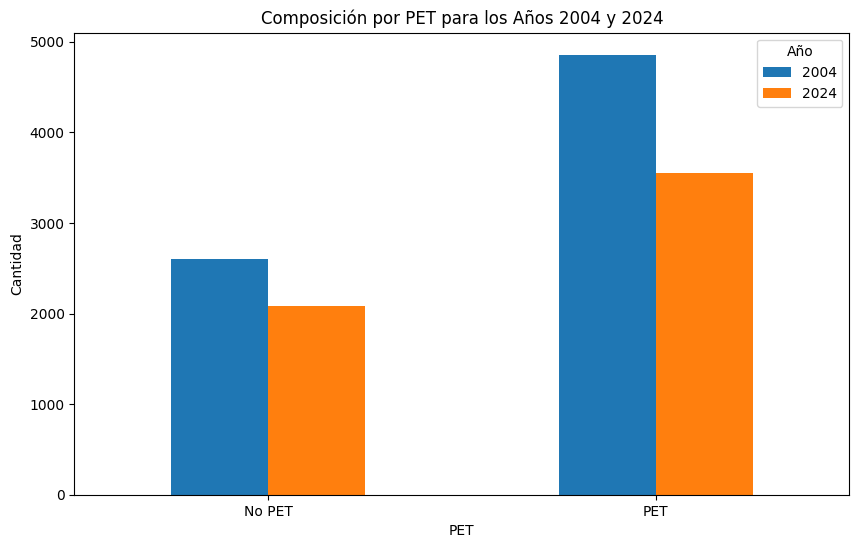

,PEA 2004,PEA 2024,PET 2004,PET 2024
0,3899,3211,2605,2082
1,3564,2425,4858,3554


In [26]:
# Agregar la columna PET (Población en Edad para Trabajar)
respondieron['PET'] = respondieron['Edad'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# Filtrar los datos para los años 2004 y 2024
pet_2004 = respondieron[respondieron['ano4'] == 2004.0]['PET'].value_counts().sort_index()
pet_2024 = respondieron[respondieron['ano4'] == 2024.0]['PET'].value_counts().sort_index()

# Crear un DataFrame con los conteos
pet_df = pd.DataFrame({
    '2004': pet_2004,
    '2024': pet_2024
}, index=[0, 1])

# Renombrar los índices para que sean 'No PET' y 'PET'
pet_df.index = ['No PET', 'PET']

# Crear el gráfico de barras
pet_df.plot(kind='bar', figsize=(10, 6))
plt.title('Composición por PET para los Años 2004 y 2024')
plt.xlabel('PET')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(title='Año')
plt.show()

# Comparar PET con PEA
pea_pet_comparison = pd.DataFrame({
    'PEA 2004': pea_2004,
    'PEA 2024': pea_2024,
    'PET 2004': pet_2004,
    'PET 2024': pet_2024
})

pea_pet_comparison

6. Por ultimo, agreguen la base respondieron una columna llamada
desocupado que tome 1 si esta desocupada. ¿Cuántas personas están desocupadas en 2004 vs 2024?

In [27]:
# Add the column "desocupado" to the dataframe "respondieron"
respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x == 2 else 0)

# Count the number of desocupied people in the year 2004
desocupado_2004 = respondieron[(respondieron['ano4'] == 2004.0) & (respondieron['desocupado'] == 1)].shape[0]

# Count the number of desocupied people in the year 2024
desocupado_2024 = respondieron[(respondieron['ano4'] == 2024.0) & (respondieron['desocupado'] == 1)].shape[0]

print(f"Number of desocupied people in 2004: {desocupado_2004}")
print(f"Number of desocupied people in 2024: {desocupado_2024}")

Number of desocupied people in 2004: 528
Number of desocupied people in 2024: 281


C:\Users\s1290226\AppData\Local\Temp\ipykernel_22756\1907167344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x == 2 else 0)


#### Parte II. Clasificación

In [28]:
import statsmodels.api as sm     

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
#from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

1. Para cada año, partan la base "respondieron" en una base de prueba (test) y una de entrenamiento (train) utilizando el comando
train_test_split. La base de entrenamiento debe comprender el 70%
de los datos, y la semilla a utilizar (random state instance) debe ser 101.
Establezca a "desocupado" como su variable dependiente en la base de
entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1)

In [ ]:
# Entrenaremos con el 70% de la base de datos del 2004 y el resto se usarán para testear 
# el modelo obtenido
# Split the data into training and testing sets
train2004, test2004 = train_test_split(df_unif_2004, test_size=0.3, random_state=101)
# Define the dependent variable y and the independent variables X
y_train_2004 = train2004['desocupado']
X_train_2004 = train2004.drop(columns=['desocupado'])

y_test_2004 = test2004['desocupado']
X_test_2004 = test2004.drop(columns=['desocupado'])

# Add a column of ones to X_train and X_test
X_train_2004 = X_train2004.assign(intercept=1)
X_test_2004 = X_test2004.assign(intercept=1)

# Repito lo mismo para el 2024
train2024, test2024 = train_test_split(df_unif_2024, test_size=0.3, random_state=101)
# Define the dependent variable y and the independent variables X
y_test_2024 = test2024['desocupado']
X_test_2024 = test2024.drop(columns=['desocupado'])

y_train_2024 = train2024['desocupado']
X_train_2024 = train2024.drop(columns=['desocupado'])

In [ ]:
# Primero hago un groupby por año para poder dividir la base en train y test
df_unif_2004 = respondieron.groupby('ano4')[df_unificado['ano4'] == 2004.0]
df_unif_2024 = respondieron.groupby('ano4')[df_unificado['ano4'] == 2024.0]

2. Implementen los siguientes métodos reportando luego la matriz de
confusión, la curva ROC, los valores de AUC y de Accuracy de cada uno:
- Regresión logística
- Análisis discriminante lineal
- KNN con k=3
- Naive Bayes

In [22]:
# Primero realizamos la regresión logística para el 2004
# Ajustamos el clasificador con el metodo fit() 
log_reg_2004 = LogisticRegression(penalty=None).fit(X_train_2004, y_train_2004)

# Y predecimos la variable dependiente para el 2004
y_test_pred_score_2004 = log_reg_2004.predict_proba(X_test_2004)[:,1]
y_test_pred_2004 = log_reg_2004.predict(X_test_2004)

# Calculamos la matriz de confusión
conf_matrix_log_2004 = confusion_matrix(y_test_2004, y_test_pred_2004)

# Calculamos AUC y ROC
auc_log_2004 = roc_auc_score(y_test_2004, y_test_pred_score_2004)
print('AUC de la regresión logística para los datos del 2004: %.4f' % auc_2004)
fpr_log_2004, tpr_log_2004, thresholds_log_2004 = roc_curve(y_test_2004, y_test_pred_score_2004, drop_intermediate=False)  # drop_intermediate=False nos da mas thresholds ('c') para probar
print('Thresholds:', thresholds_log_2004)
print('FPR:', fpr_log_2004)
print('TPR:', tpr_log_2004)

NameError: name 'LogisticRegression' is not defined